In [86]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress = True)
from importlib import reload
import functions, arithmetic, circuits
from functions import *
from arithmetic import *
from circuits import *

functions = reload(functions)
arithmetic = reload(arithmetic)
circuits = reload(circuits)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
b = 3
qasm_qc = QuantumCircuit(b, b)
QFT(qasm_qc, b, delta=8)
qasm_output = qasm_qc.qasm()

In [30]:
with open("qasm_files/qasm{}qubit".format(b), 'w') as txt_file:
    txt_file.write(qasm_output)

In [ ]:
n_low = 2
n_high = 32
compareFTs(n_low, n_high, backend="statevector", display_bool=False)

errors2-32.txt
n=2, i=0
progress: 50.00%
--- 0.010s seconds ---
n=3, i=1
progress: 33.33%
progress: 66.67%
--- 0.038s seconds ---
n=4, i=2
progress: 25.00%
progress: 50.00%
progress: 75.00%
--- 0.085s seconds ---
n=5, i=3
progress: 20.00%
progress: 40.00%
progress: 60.00%
progress: 80.00%
--- 0.179s seconds ---
n=6, i=4
progress: 16.67%
progress: 33.33%
progress: 50.00%
progress: 66.67%
progress: 83.33%
--- 0.301s seconds ---
n=7, i=5
progress: 14.29%
progress: 28.57%
progress: 42.86%
progress: 57.14%
progress: 71.43%
progress: 85.71%
--- 0.476s seconds ---
n=8, i=6
progress: 12.50%
progress: 25.00%
progress: 37.50%
progress: 50.00%
progress: 62.50%
progress: 75.00%
progress: 87.50%
--- 0.797s seconds ---
n=9, i=7
progress: 11.11%
progress: 22.22%
progress: 33.33%
progress: 44.44%
progress: 55.56%
progress: 66.67%
progress: 77.78%
progress: 88.89%
--- 1.109s seconds ---
n=10, i=8
progress: 10.00%
progress: 20.00%
progress: 30.00%
progress: 40.00%
progress: 50.00%
progress: 60.00%
progr

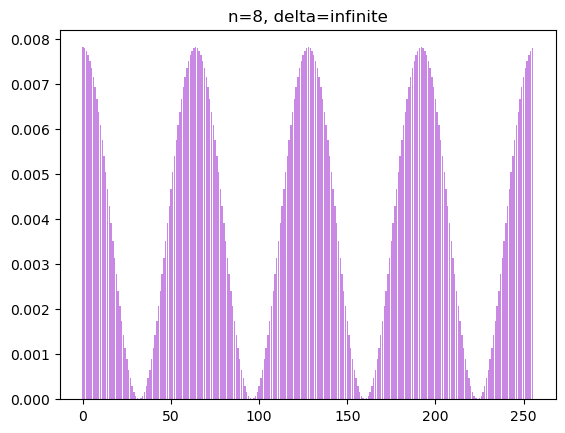

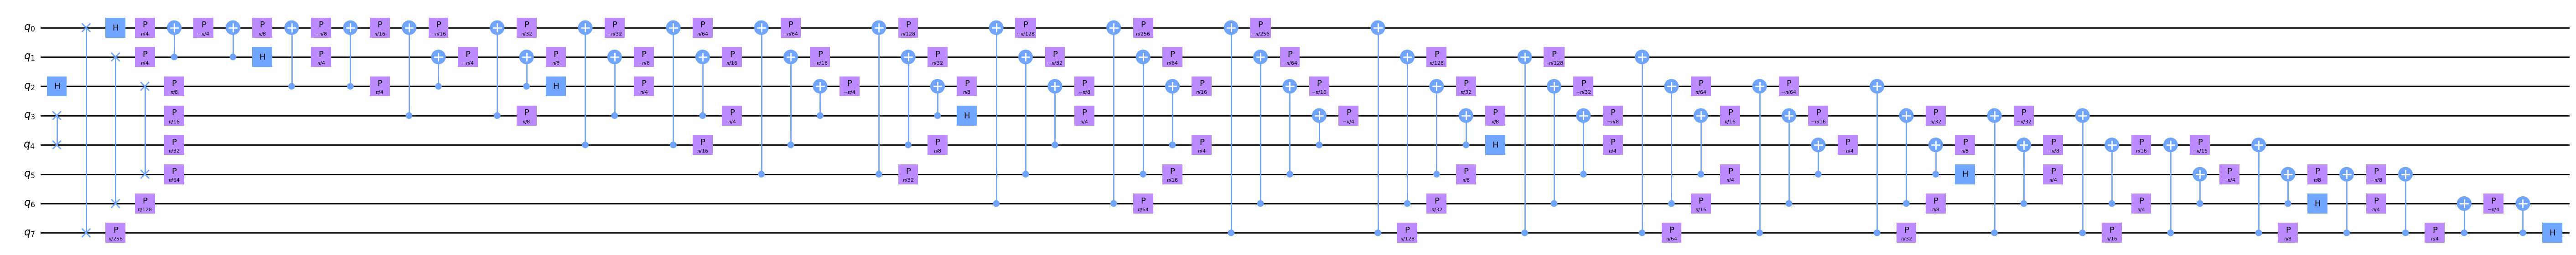

<Figure size 640x480 with 0 Axes>

In [32]:
n = 8
ac = QuantumCircuit(n)
ac.h(2)
QFT(ac, n)

probs = simulateQFT(ac, n, display_bool=True)

ac.draw(output="mpl", fold=-1)

min_n = 2, max_n = 28, min_d = 1, max_d = 27
(28, 27)
x = 2, y = 1, data = 1.6697788640876683e-34
x = 3, y = 1, data = 0.06250000000000006
x = 3, y = 2, data = 0.0
x = 4, y = 1, data = 0.03125000000000003
x = 4, y = 2, data = 3.469446951953614e-18
x = 4, y = 3, data = 6.938893903907228e-18
x = 5, y = 1, data = 0.023437500000000014
x = 5, y = 2, data = 0.007812500000000014
x = 5, y = 3, data = 3.7947076036992655e-18
x = 5, y = 4, data = 5.095750210681871e-18
x = 6, y = 1, data = 0.01171875000000001
x = 6, y = 2, data = 0.003906250000000007
x = 6, y = 3, data = 5.8817967857338616e-18
x = 6, y = 4, data = 6.152847328855238e-18
x = 6, y = 5, data = 1.734723475976807e-18
x = 7, y = 1, data = 0.006835937500000006
x = 7, y = 2, data = 0.002929687500000008
x = 7, y = 3, data = 0.0009765625000000043
x = 7, y = 4, data = 2.930733997499879e-18
x = 7, y = 5, data = 1.9786689647860456e-18
x = 7, y = 6, data = 1.2536087619363645e-18
x = 8, y = 1, data = 0.003417968750000003
x = 8, y = 2, data = 0.00

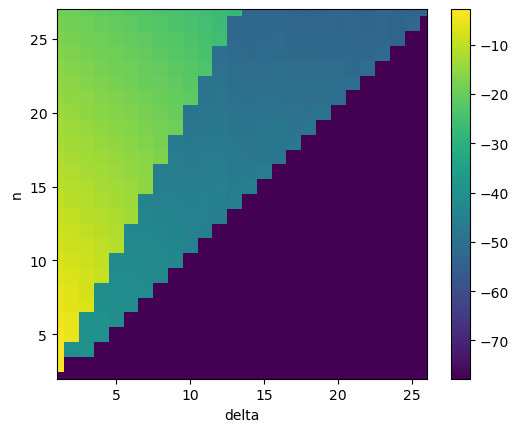

In [3]:
plotErrorsFromFile("txt/errors2-32.txt")

{'0000001': 1024}
1: 100.0%
operation count: 62
operations: {'cx': 24, 'ccx': 22, 'u': 7, 'measure': 7, 'barrier': 2}


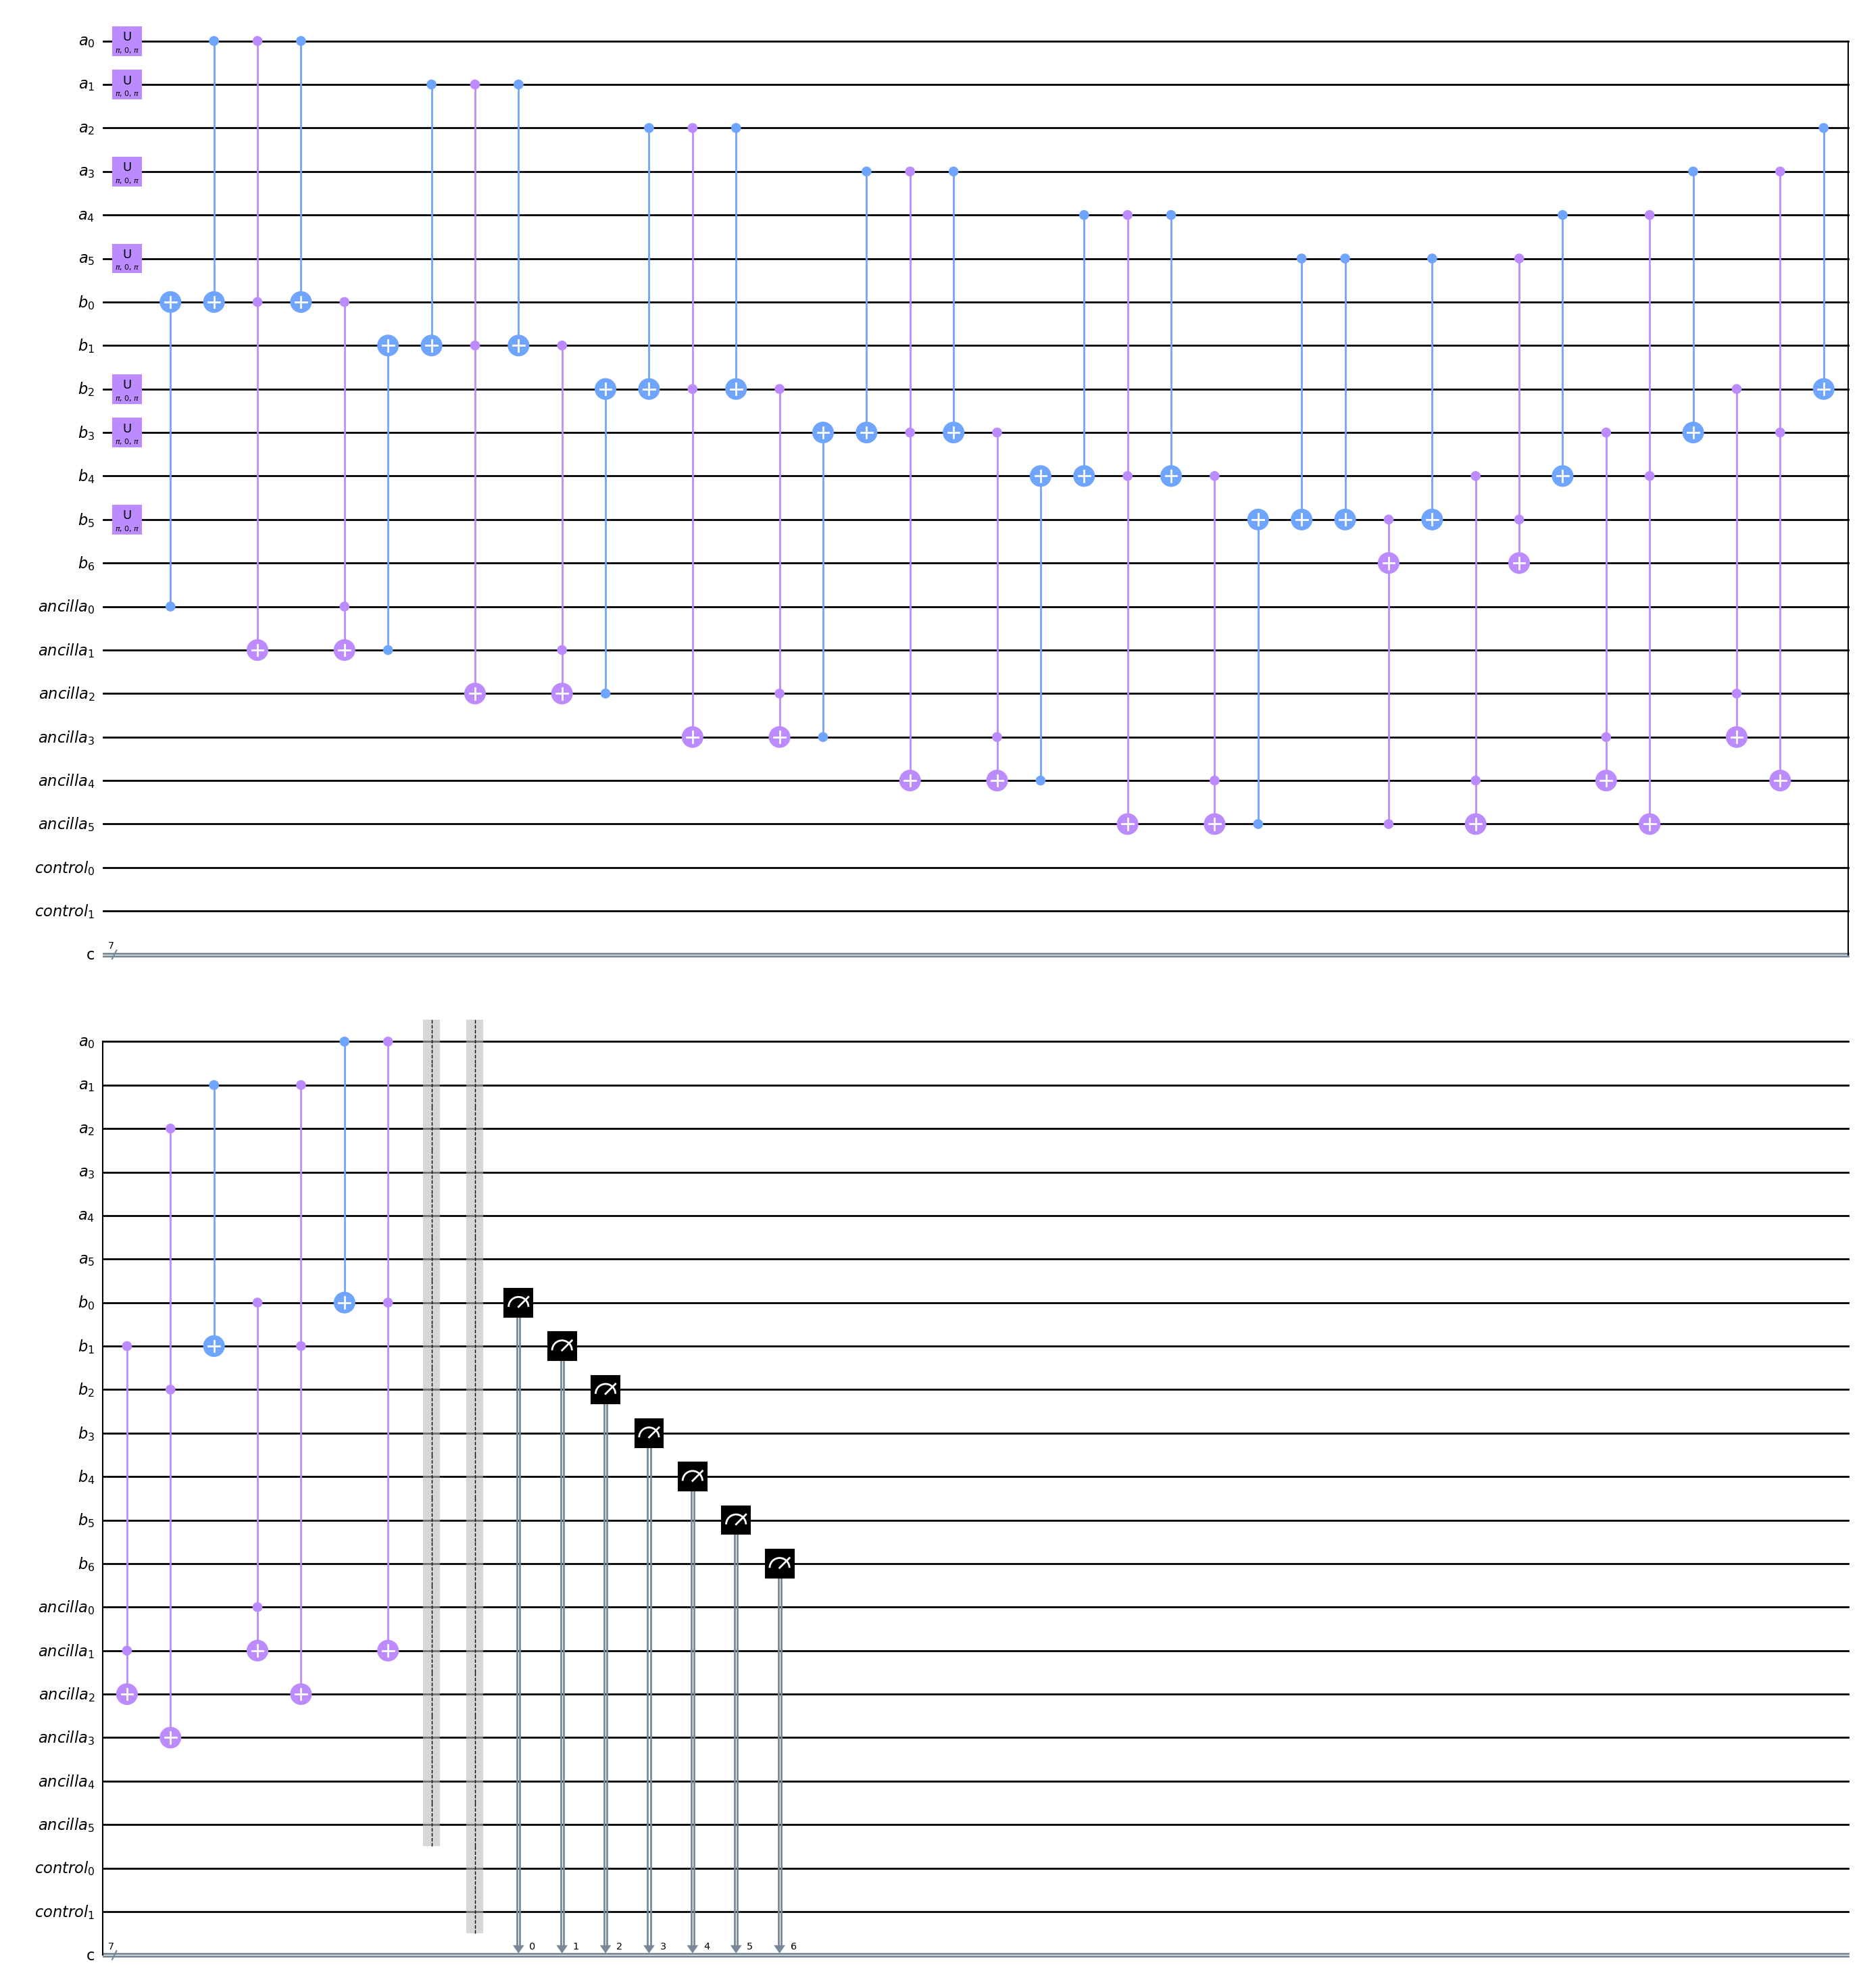

In [72]:
# n-bit adder
from qiskit import QuantumRegister, ClassicalRegister

# addends
a = 43
b = 44

reverse_bool = True
qc = adderCircuit(a, b, reverse_bool)

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

counts = convertKeys(counts)
for outcome, count in counts.items():
    print("{}: {}%".format(outcome, count / sum(counts.values()) * 100))

decomposed = qc.decompose(reps=2)
print("operation count: {}".format(sum(dict(decomposed.count_ops()).values())))
print("operations: {}".format(dict(decomposed.count_ops())))

decomposed.draw(output="mpl", fold=40, filename="circuits/{}-bitAdderDecomposed{}.png".format(n, "Reversed" if reverse_bool == True else ""))

{'11100': 1024}
28: 100.0%
operation count: 50
operations: {'u3': 14, 'swap': 10, 'cx': 8, 'barrier': 6, 'measure': 5, '5-bit adder, ': 3, '5-bit adder, rev_dg': 2, 'x': 2}


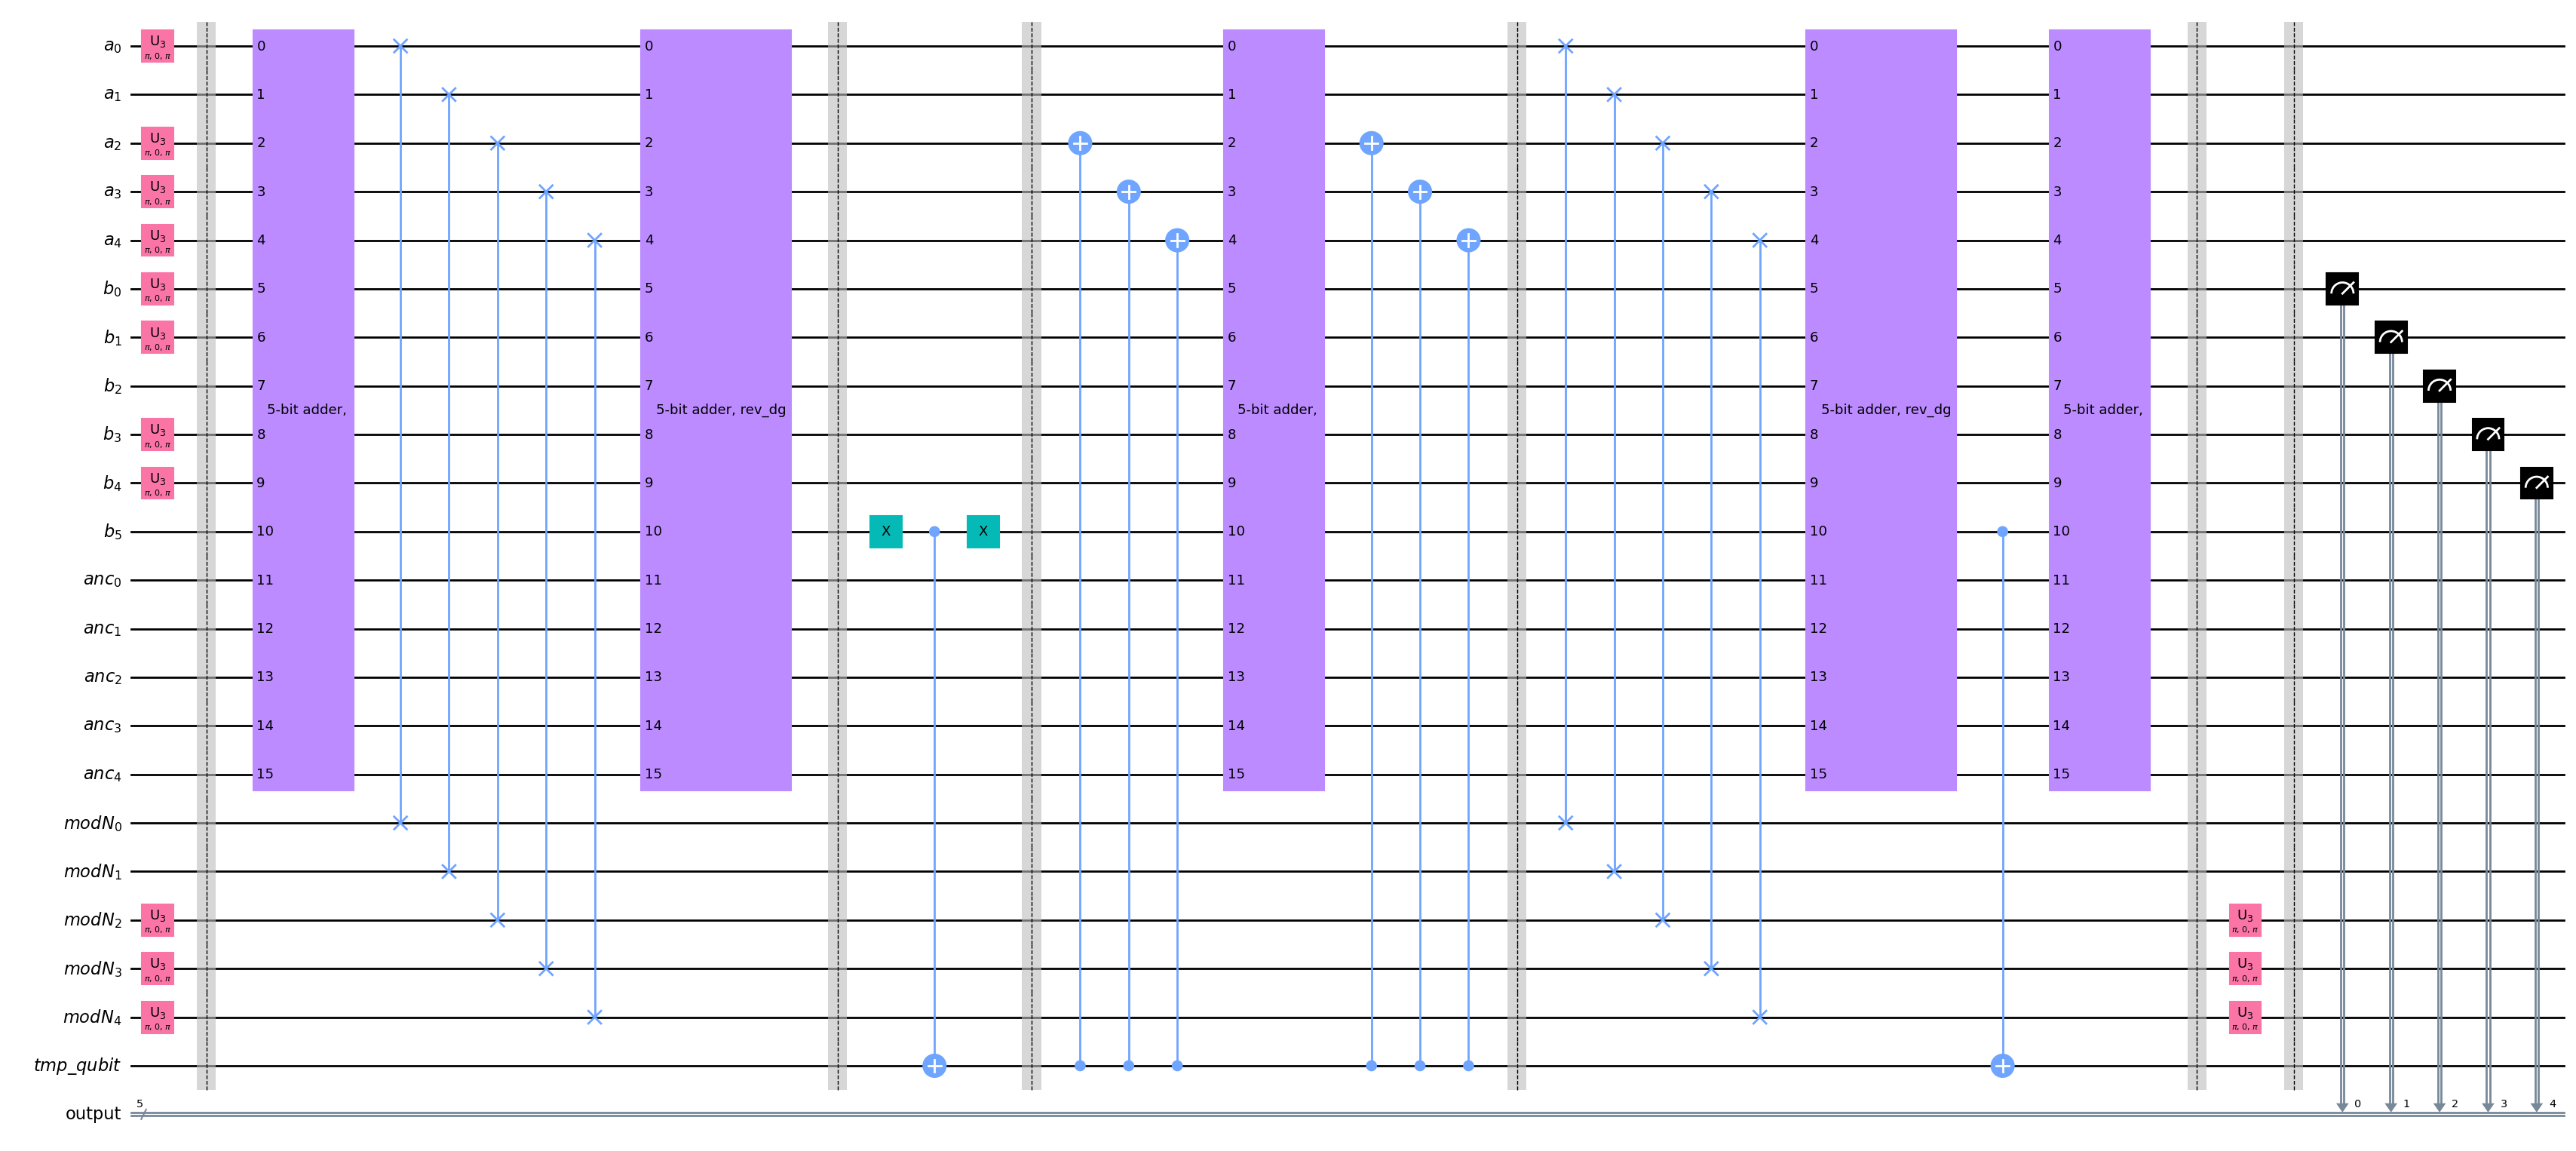

In [84]:
a = 29
b = 27
N = 28

qc = modNAdderCircuit(a, b, N)

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

counts = convertKeys(counts)
for outcome, count in counts.items():
    print("{}: {}%".format(outcome, count / sum(counts.values()) * 100))

decomposed = qc.decompose(reps=1)
print("operation count: {}".format(sum(dict(decomposed.count_ops()).values())))
print("operations: {}".format(dict(decomposed.count_ops())))

decomposed.draw(output="mpl", fold=80, filename="circuits/{}-bitAdderDecomposed{}.png".format(n, "Reversed" if reverse_bool == True else ""))

a = 15, binMod = 01111
a = 30, binMod = 11110
a = 60, binMod = 11101
a = 120, binMod = 11011
a = 240, binMod = 10111
{'01100': 1024}
12: 100.0%
operation count: 74
operations: {'ccx': 45, 'u3': 14, '5-bitModNadder, ': 5, 'measure': 5, 'barrier': 3, 'x': 2}


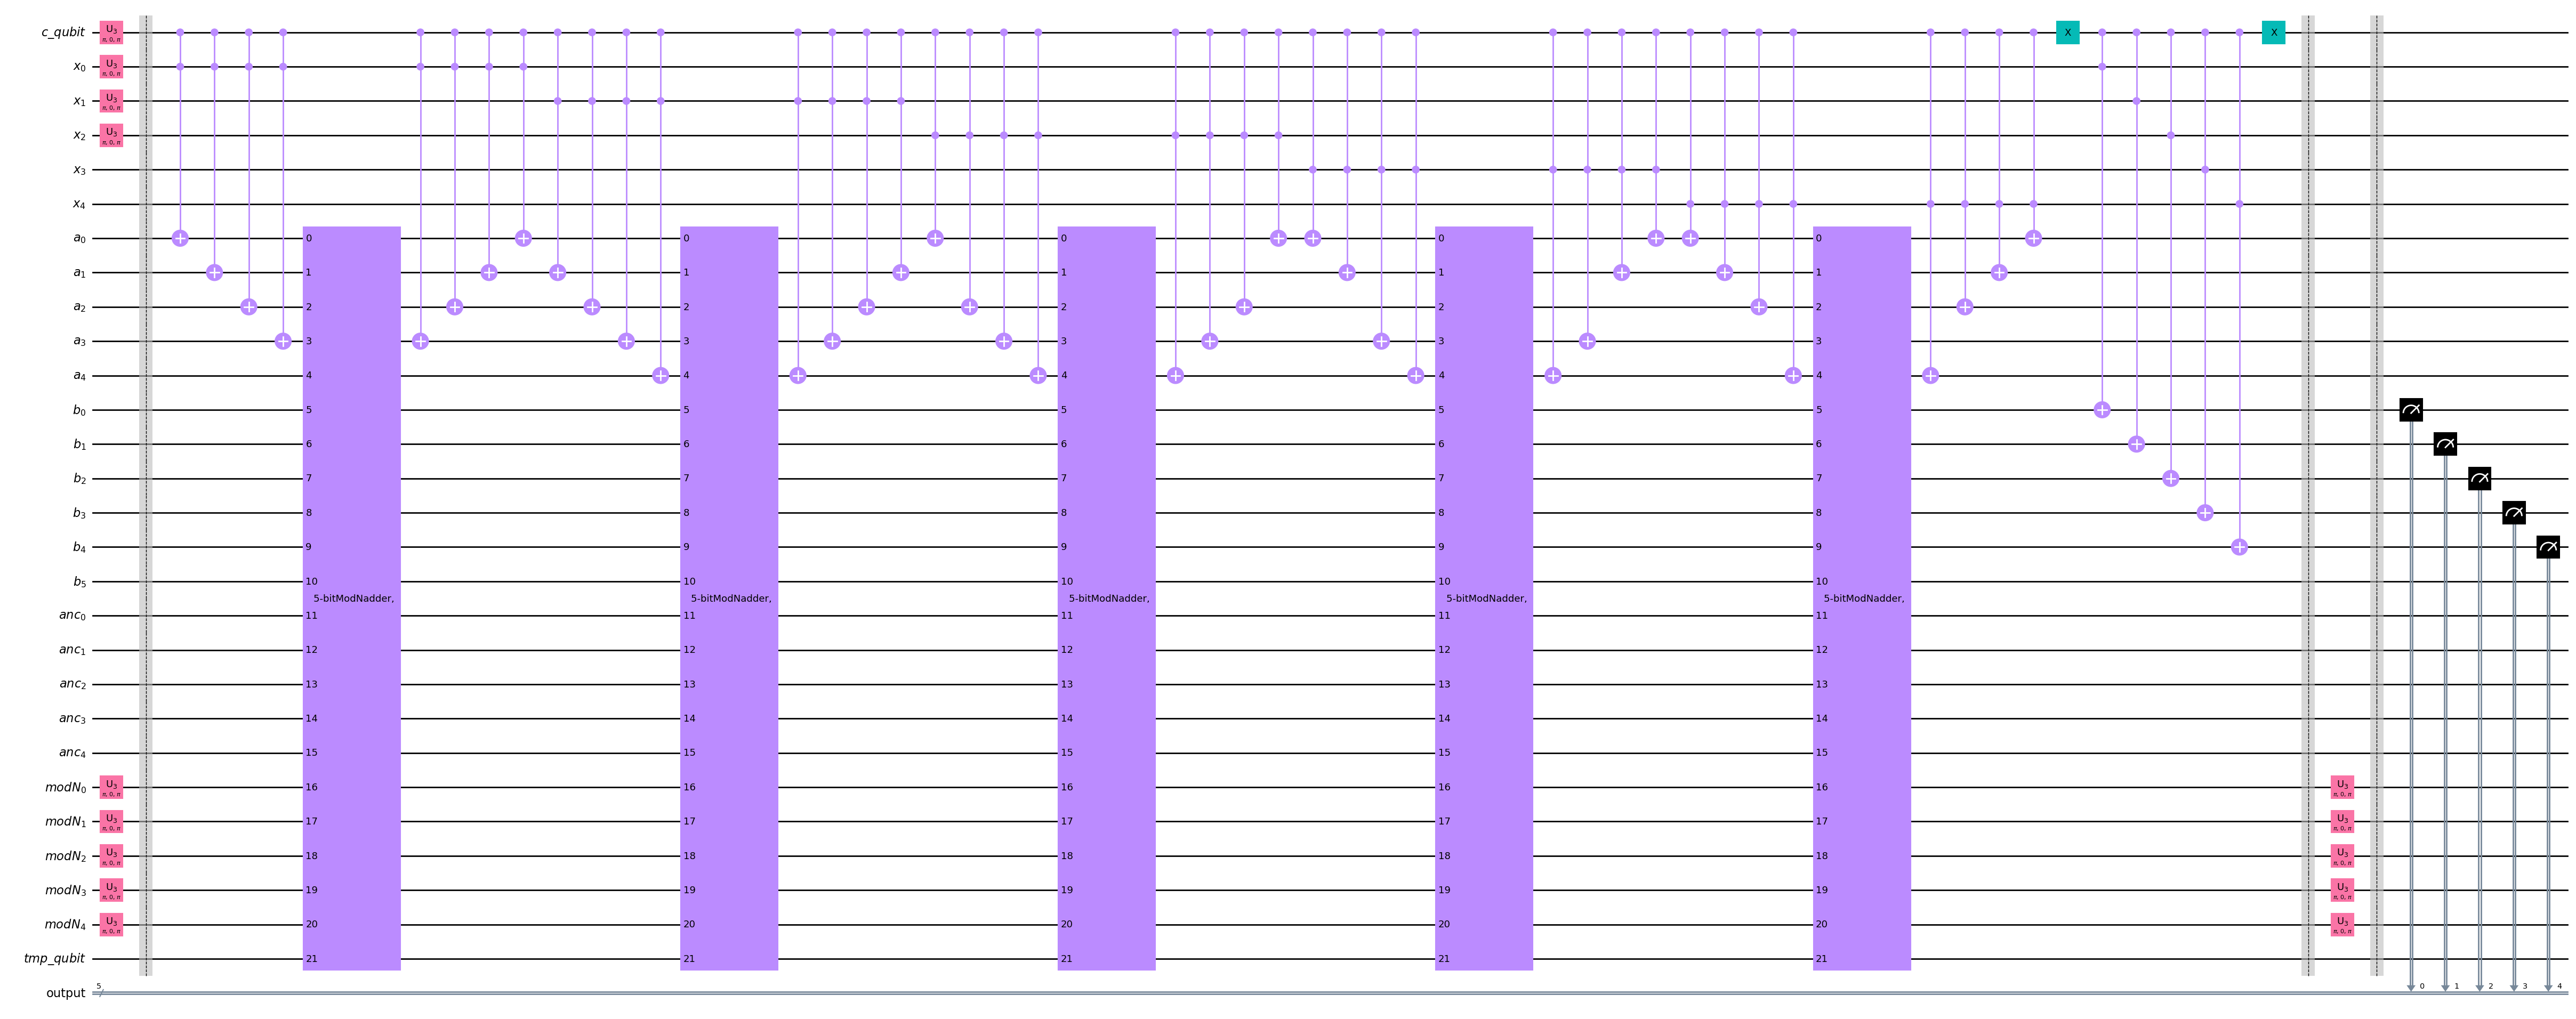

In [88]:
x = 7
g = 15
N = 31

qc = modNMultiplierCircuit(x, g, N)
simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

counts = convertKeys(counts)
for outcome, count in counts.items():
    print("{}: {}%".format(outcome, count / sum(counts.values()) * 100))

decomposed = qc.decompose(reps=1)
print("operation count: {}".format(sum(dict(decomposed.count_ops()).values())))
print("operations: {}".format(dict(decomposed.count_ops())))

decomposed.draw(output="mpl", fold=80, filename="circuits/{}-bitAdderDecomposed{}.png".format(n, "Reversed" if reverse_bool == True else ""))

a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 32, binMod = 0010
a = 64, binMod = 0100
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 32, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 16, binMod = 0001
a = 32, binMod = 0010
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
a = 1, binMod = 0001
a = 2, binMod = 0010
a = 4, binMod = 0100
a = 8, binMod = 1000
000000000000000000000000000
000000000000000000000000001
000000000000000000000000010
000000000000000000000000011
000000000000000000000000100
000000000000000000000000101
000000000000000000000000110
000000000000000000000000111
000000000000000000000001000
000000000000000000000001001
000000000000000000000001010
000000000000

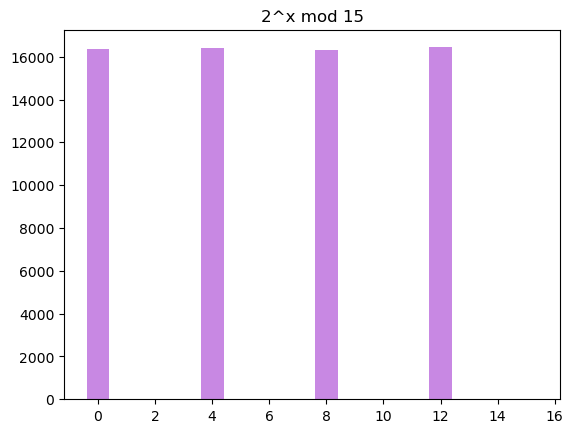

<Figure size 640x480 with 0 Axes>

In [80]:
# modular exponentiation mod N
n = 4
len_exp = n
no_qubits = len_exp + 5 * n + 3

reg_exp = QuantumRegister(len_exp, name = "reg_exp")
reg_c_qubit = QuantumRegister(1, name="reg_control")
reg_x = QuantumRegister(n, name="reg_x")
reg_a = QuantumRegister(n, name="reg_a")
reg_b = QuantumRegister(n + 1, name="reg_b")
reg_anc = QuantumRegister(n, name="reg_anc")
reg_N = QuantumRegister(n, name="reg_modN")
reg_tmp_qubit = QuantumRegister(1, name="reg_tmp_qubit")
cr = ClassicalRegister(no_qubits, name="reg_output")

g = 2

# use numpy nonzero to convert N into gates
N = 15

qc = QuantumCircuit(reg_exp, reg_c_qubit, reg_x, reg_a, reg_b, reg_anc, reg_N, reg_tmp_qubit, cr)

qc.h(reg_exp[i] for i in range(len_exp))
qc.x(reg_N[i] for i in [0,1,2,3])
qc.x(reg_x[0])

qc.append(nbitModExponentiation(n, g, N, reg_exp, reg_c_qubit, reg_x, reg_a, reg_b, reg_anc, reg_N, reg_tmp_qubit), reg_exp[0:len_exp] + reg_c_qubit[0:1] + reg_x[0:n] + reg_a[0:n] + reg_b[0:n + 1] + reg_anc[0:n] + reg_N[0:n] + reg_tmp_qubit[0:1])

qc.append(nbitQFT(len_exp, reg_exp, reversed=True), reg_exp[0:len_exp])

qc.measure(reg_exp[0:len_exp], cr[0:len_exp])
#
simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=2**16)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

plotShor(no_qubits, len_exp, counts, g, N)

# reps = 5
# qc.decompose(reps=reps).draw(output="mpl", fold=-1, scale=1, filename="circuits/{}-bitModNExponentiation{}".format(n, "(decomposed)" if reps > 0 else ""))

In [25]:
reps = 5
qasm_output = qc.decompose(reps=reps).qasm()
with open("qasm_files/ShorsAlg(N={}, g={},reps={})".format(N, g, reps), 'w') as txt_file:
    txt_file.write(qasm_output)

# qc.decompose(reps=reps).draw(output="mpl", fold=-1, scale=1, filename="circuits/{}-bitModNExponentiation{}".format(n, "(decomposed)" if reps > 0 else ""))

In [3]:
from winsound import Beep
reps = 5
qc.decompose(reps=reps).draw(output="mpl", fold=400, scale=0.4, plot_barriers=False, filename="circuits/{}-bitMod{}Exponentiation{}".format(n, N,"(decomposed)" if reps > 0 else ""))

Beep(200, 1000)